## Imports

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import yfinance as yf
import datetime as dt

pio.templates.default = "plotly_white"


In [180]:
# Set time range

end = dt.datetime.now()
start = dt.datetime(2015, 1, 1)
start, end

(datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2025, 7, 21, 23, 27, 11, 952934))

In [181]:
# Define the list of stock tickers
tickers = ['JNJ', 'PG', 'KO', 'MSFT', 'BRK-B', 'V', 'TSLA', 'NVDA', 'META', 'AMZN','^GSPC']

# Define a mapping from tickers to full names
ticker_name_map = {
    'JNJ': 'Johnson & Johnson',
    'PG': 'Procter & Gamble',
    'KO': 'Coca-Cola',
    'MSFT': 'Microsoft',
    'BRK-B': 'Berkshire Hathaway',
    'V': 'Visa',
    'TSLA': 'Tesla',
    'NVDA': 'Nvidia',
    'META': 'Meta Platforms',
    'AMZN': 'Amazon',
    '^GSPC': 'S&P 500'
}



In [182]:
import yfinance as yf

tickers = ['JNJ', 'PG', 'KO', 'MSFT', 'BRK-B', 'V', 'TSLA', 'NVDA', 'META', 'AMZN','^GSPC']
df = yf.download(tickers, start=start, end=end)
df.rename(columns=ticker_name_map, inplace=True)
df

/tmp/ipython-input-182-2741211680.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  11 of 11 completed


Price            Close                                                  \
Ticker          Amazon Berkshire Hathaway Johnson & Johnson  Coca-Cola   
Date                                                                     
2015-01-02   15.426000         149.169998         78.012619  30.222622   
2015-01-05   15.109500         147.000000         77.467758  30.222622   
2015-01-06   14.764500         146.839996         77.087097  30.452110   
2015-01-07   14.921000         148.880005         78.788849  30.832249   
2015-01-08   15.023000         151.369995         79.408348  31.205173   
...                ...                ...               ...        ...   
2025-07-15  226.350006         470.130005        155.169998  69.360001   
2025-07-16  223.190002         471.309998        164.779999  69.269997   
2025-07-17  223.880005         473.399994        162.979996  70.589996   
2025-07-18  226.130005         473.799988        163.699997  69.849998   
2025-07-21  229.300003         474.410004        164.360001  70.070000   

Price                                                               \
Ticker     Meta Platforms   Microsoft      Nvidia Procter & Gamble   
Date                                                                 
2015-01-02      78.021965   39.998703    0.483066        66.983498   
2015-01-05      76.768852   39.630886    0.474906        66.665024   
2015-01-06      75.734520   39.049206    0.460508        66.361351   
2015-01-07      75.734520   39.545357    0.459308        66.709450   
2015-01-08      77.753441   40.708683    0.476586        67.472328   
...                   ...         ...         ...              ...   
2025-07-15     710.390015  505.820007  170.699997       151.642960   
2025-07-16     702.909973  505.619995  171.369995       152.685837   
2025-07-17     701.409973  511.700012  173.000000       154.562988   
2025-07-18     704.280029  510.049988  172.410004       155.100006   
2025-07-21     712.965027  510.059998  171.380005       155.029999   

Price                               ...             Volume                    \
Ticker           Tesla        Visa  ... Berkshire Hathaway Johnson & Johnson   
Date                                ...                                        
2015-01-02   14.620667   61.570618  ...            3436400           5753600   
2015-01-05   14.006000   60.211533  ...            4168800           8079300   
2015-01-06   14.085333   59.823551  ...            4116100           7428000   
2015-01-07   14.063333   60.625061  ...            4159100           7931700   
2015-01-08   14.041333   61.438206  ...            4282100           9916000   
...                ...         ...  ...                ...               ...   
2025-07-15  310.779999  347.019989  ...            4482300           6873200   
2025-07-16  321.670013  349.899994  ...            3796900          22134800   
2025-07-17  319.410004  349.809998  ...            4040000          11295700   
2025-07-18  329.649994  349.049988  ...            4012400           9792600   
2025-07-21  328.489990  350.940002  ...            2996521           5708670   

Price                                                                      \
Ticker     Coca-Cola Meta Platforms Microsoft     Nvidia Procter & Gamble   
Date                                                                        
2015-01-02   9921100       18177500  27913900  113680000          7251400   
2015-01-05  26292600       26452200  39673900  197952000          8626100   
2015-01-06  16897500       27399300  36447900  197764000          7791200   
2015-01-07  13412300       22045300  29114100  321808000          5986600   
2015-01-08  21743600       23961000  29645200  283780000          6823300   
...              ...            ...       ...        ...              ...   
2025-07-15  12639800       11529500  14927200  230627400          9142600   
2025-07-16  13178300       13067600  15154400  158831500          8479000   
2025-07-17  20

In [183]:
close = df['Close']
close

Ticker          Amazon  Berkshire Hathaway  Johnson & Johnson  Coca-Cola  \
Date                                                                       
2015-01-02   15.426000          149.169998          78.012619  30.222622   
2015-01-05   15.109500          147.000000          77.467758  30.222622   
2015-01-06   14.764500          146.839996          77.087097  30.452110   
2015-01-07   14.921000          148.880005          78.788849  30.832249   
2015-01-08   15.023000          151.369995          79.408348  31.205173   
...                ...                 ...                ...        ...   
2025-07-15  226.350006          470.130005         155.169998  69.360001   
2025-07-16  223.190002          471.309998         164.779999  69.269997   
2025-07-17  223.880005          473.399994         162.979996  70.589996   
2025-07-18  226.130005          473.799988         163.699997  69.849998   
2025-07-21  229.300003          474.410004         164.360001  70.070000   

Ticker      Meta Platforms   Microsoft      Nvidia  Procter & Gamble  \
Date                                                                   
2015-01-02       78.021965   39.998703    0.483066         66.983498   
2015-01-05       76.768852   39.630886    0.474906         66.665024   
2015-01-06       75.734520   39.049206    0.460508         66.361351   
2015-01-07       75.734520   39.545357    0.459308         66.709450   
2015-01-08       77.753441   40.708683    0.476586         67.472328   
...                    ...         ...         ...               ...   
2025-07-15      710.390015  505.820007  170.699997        151.642960   
2025-07-16      702.909973  505.619995  171.369995        152.685837   
2025-07-17      701.409973  511.700012  173.000000        154.562988   
2025-07-18      704.280029  510.049988  172.410004        155.100006   
2025-07-21      712.965027  510.059998  171.380005        155.029999   

Ticker           Tesla        Visa      S&P 500  
Date                                             
2015-01-02   14.620667   61.570618  2058.199951  
2015-01-05   14.006000   60.211533  2020.579956  
2015-01-06   14.085333   59.823551  2002.609985  
2015-01-07   14.063333   60.625061  2025.900024  
2015-01-08   14.041333   61.438206  2062.139893  
...                ...         ...          ...  
2025-07-15  310.779999  347.019989  6243.759766  
2025-07-16  321.670013  349.899994  6263.700195  
2025-07-17  319.410004  349.809998  6297.359863  
2025-07-18  329.649994  349.049988  6296.790039  
2025-07-21  328.489990  350.940002  6305.600098  

[2652 rows x 11 columns]

In [184]:
# Sort the stock data by date
close = close.sort_index()

close


Ticker          Amazon  Berkshire Hathaway  Johnson & Johnson  Coca-Cola  \
Date                                                                       
2015-01-02   15.426000          149.169998          78.012619  30.222622   
2015-01-05   15.109500          147.000000          77.467758  30.222622   
2015-01-06   14.764500          146.839996          77.087097  30.452110   
2015-01-07   14.921000          148.880005          78.788849  30.832249   
2015-01-08   15.023000          151.369995          79.408348  31.205173   
...                ...                 ...                ...        ...   
2025-07-15  226.350006          470.130005         155.169998  69.360001   
2025-07-16  223.190002          471.309998         164.779999  69.269997   
2025-07-17  223.880005          473.399994         162.979996  70.589996   
2025-07-18  226.130005          473.799988         163.699997  69.849998   
2025-07-21  229.300003          474.410004         164.360001  70.070000   

Ticker      Meta Platforms   Microsoft      Nvidia  Procter & Gamble  \
Date                                                                   
2015-01-02       78.021965   39.998703    0.483066         66.983498   
2015-01-05       76.768852   39.630886    0.474906         66.665024   
2015-01-06       75.734520   39.049206    0.460508         66.361351   
2015-01-07       75.734520   39.545357    0.459308         66.709450   
2015-01-08       77.753441   40.708683    0.476586         67.472328   
...                    ...         ...         ...               ...   
2025-07-15      710.390015  505.820007  170.699997        151.642960   
2025-07-16      702.909973  505.619995  171.369995        152.685837   
2025-07-17      701.409973  511.700012  173.000000        154.562988   
2025-07-18      704.280029  510.049988  172.410004        155.100006   
2025-07-21      712.965027  510.059998  171.380005        155.029999   

Ticker           Tesla        Visa      S&P 500  
Date                                             
2015-01-02   14.620667   61.570618  2058.199951  
2015-01-05   14.006000   60.211533  2020.579956  
2015-01-06   14.085333   59.823551  2002.609985  
2015-01-07   14.063333   60.625061  2025.900024  
2015-01-08   14.041333   61.438206  2062.139893  
...                ...         ...          ...  
2025-07-15  310.779999  347.019989  6243.759766  
2025-07-16  321.670013  349.899994  6263.700195  
2025-07-17  319.410004  349.809998  6297.359863  
2025-07-18  329.649994  349.049988  6296.790039  
2025-07-21  328.489990  350.940002  6305.600098  

[2652 rows x 11 columns]

In [185]:
# Print out the number of stocks
print('Total Number of stocks : {}'.format(len(close.columns)))

Total Number of stocks : 11


In [186]:
# Print the name of stocks
print('Stocks under consideration are:')

for i in close.columns:
  print(i)

Stocks under consideration are:
Amazon
Berkshire Hathaway
Johnson & Johnson
Coca-Cola
Meta Platforms
Microsoft
Nvidia
Procter & Gamble
Tesla
Visa
S&P 500


In [187]:
# Check if data contains any null values
close.isnull().sum()

Ticker
Amazon                0
Berkshire Hathaway    0
Johnson & Johnson     0
Coca-Cola             0
Meta Platforms        0
Microsoft             0
Nvidia                0
Procter & Gamble      0
Tesla                 0
Visa                  0
S&P 500               0
dtype: int64

In [188]:
# Getting dataframe info
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2652 entries, 2015-01-02 to 2025-07-21
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Amazon              2652 non-null   float64
 1   Berkshire Hathaway  2652 non-null   float64
 2   Johnson & Johnson   2652 non-null   float64
 3   Coca-Cola           2652 non-null   float64
 4   Meta Platforms      2652 non-null   float64
 5   Microsoft           2652 non-null   float64
 6   Nvidia              2652 non-null   float64
 7   Procter & Gamble    2652 non-null   float64
 8   Tesla               2652 non-null   float64
 9   Visa                2652 non-null   float64
 10  S&P 500             2652 non-null   float64
dtypes: float64(11)
memory usage: 248.6 KB


In [189]:
# Define a function to plot the entire dataframe
# The function performs data visualization
# Pandas works great with matplotlib, I'll simply plot data directly from a Pandas DataFrame using plot() method

def show_plot(df, fig_title):
    """
    Plots the stock data from a dataframe using Matplotlib.

    Args:
        df (pd.DataFrame): Data to plot
        fig_title (str): Title of the plot
    """
    df.plot(figsize=(15, 7), linewidth=1.5, title=fig_title)
    plt.grid()
    plt.show()


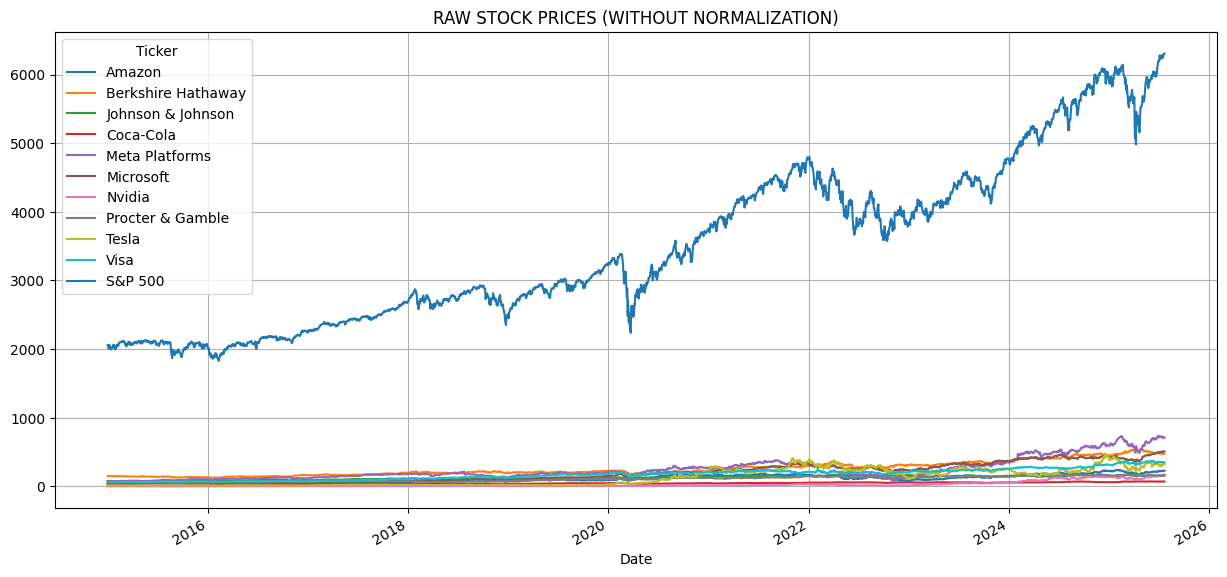

In [190]:
# Plot the data
show_plot(close, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [191]:
# Get the min and max values for each stock in the 'Close' DataFrame
min_close = close.min()
max_close = close.max()

# Print the min and max values
print("Minimum Closing Price for Each Stock:")
print(min_close)

print("\nMaximum Closing Price for Each Stock:")
max_close

Minimum Closing Price for Each Stock:
Ticker
Amazon                  14.347500
Berkshire Hathaway     124.129997
Johnson & Johnson       69.216721
Coca-Cola               27.698988
Meta Platforms          73.645981
Microsoft               34.558346
Nvidia                   0.459308
Procter & Gamble        51.593887
Tesla                    9.578000
Visa                    57.235439
S&P 500               1829.079956
dtype: float64

Maximum Closing Price for Each Stock:


Ticker
Amazon                 242.059998
Berkshire Hathaway     539.799988
Johnson & Johnson      168.796448
Coca-Cola               73.378281
Meta Platforms         738.090027
Microsoft              511.700012
Nvidia                 173.000000
Procter & Gamble       176.298782
Tesla                  479.859985
Visa                   373.309998
S&P 500               6305.600098
dtype: float64

In [192]:
def view_stock_prices_on_date(close, date_to_view):
    """
    Prints the stock prices from a given DataFrame for a specific date.

    Args:
        close (pd.DataFrame): DataFrame containing stock prices, with dates as index.
        date_to_view (str): The date to retrieve prices for (format: 'YYYY-MM-DD').

    Returns:
        None: Prints the stock prices or a message if the date is not found.
    """
    if date_to_view in close.index:
        print(close.loc[date_to_view])
    else:
        print(f"Data for {date_to_view} not found in the DataFrame.")

view_stock_prices_on_date(close, '2020-08-11')


Ticker
Amazon                 154.033493
Berkshire Hathaway     212.660004
Johnson & Johnson      127.520264
Coca-Cola               41.185646
Meta Platforms         254.732529
Microsoft              194.855453
Nvidia                  10.814355
Procter & Gamble       117.731659
Tesla                   91.625999
Visa                   190.864471
S&P 500               3333.689941
Name: 2020-08-11 00:00:00, dtype: float64


In [193]:
import plotly.express as px

def interactive_plot(df, title):
    """
    Creates an interactive line plot using Plotly Express for multiple time series.

    Args:
        df (pd.DataFrame): A DataFrame where each column represents a stock or asset,
                           and the index represents time (e.g., dates).
        title (str): Title for the plot.

    Returns:
        plotly.graph_objects.Figure: A Plotly figure object with interactive features.
    """
    fig = px.line()  # We will add each trace manually below

    for column in df.columns:
        fig.add_scatter(x=df.index, y=df[column], name=column)

    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Value',
                      template='plotly_dark', height=500)

    return fig


In [194]:
# Example usage
fig = interactive_plot(close, 'STOCK PRICES (WITHOUT NORMALIZATION)')
fig.show()


In [195]:
def normalize(df):
    """
    Normalizes a DataFrame of time series data so that all columns start at 1.

    Each column is divided by its first value (row index 0), making it easy to
    compare percentage-based performance over time.

    Args:
        df (pd.DataFrame): A DataFrame of asset prices with datetime index and
                           one column per asset/ticker.

    Returns:
        pd.DataFrame: Normalized DataFrame where each column starts at 1.
    """
    normalized_df = df.copy()
    for column in normalized_df.columns:
        normalized_df[column] = normalized_df[column] / normalized_df[column].iloc[0]

    return normalized_df


In [196]:
normalized_close = normalize(close)
normalized_close

Ticker         Amazon  Berkshire Hathaway  Johnson & Johnson  Coca-Cola  \
Date                                                                      
2015-01-02   1.000000            1.000000           1.000000   1.000000   
2015-01-05   0.979483            0.985453           0.993016   1.000000   
2015-01-06   0.957118            0.984380           0.988136   1.007593   
2015-01-07   0.967263            0.998056           1.009950   1.020171   
2015-01-08   0.973875            1.014748           1.017891   1.032510   
...               ...                 ...                ...        ...   
2025-07-15  14.673280            3.151639           1.989037   2.294970   
2025-07-16  14.468430            3.159550           2.112222   2.291992   
2025-07-17  14.513160            3.173560           2.089149   2.335668   
2025-07-18  14.659018            3.176242           2.098378   2.311183   
2025-07-21  14.864515            3.180331           2.106839   2.318462   

Ticker      Meta Platforms  Microsoft      Nvidia  Procter & Gamble  \
Date                                                                  
2015-01-02        1.000000   1.000000    1.000000          1.000000   
2015-01-05        0.983939   0.990804    0.983110          0.995245   
2015-01-06        0.970682   0.976262    0.953304          0.990712   
2015-01-07        0.970682   0.988666    0.950820          0.995909   
2015-01-08        0.996558   1.017750    0.986587          1.007298   
...                    ...        ...         ...               ...   
2025-07-15        9.105000  12.645910  353.368211          2.263885   
2025-07-16        9.009129  12.640910  354.755182          2.279455   
2025-07-17        8.989904  12.792915  358.129476          2.307479   
2025-07-18        9.026689  12.751663  356.908117          2.315496   
2025-07-21        9.138004  12.751913  354.775904          2.314451   

Ticker          Tesla      Visa   S&P 500  
Date                                       
2015-01-02   1.000000  1.000000  1.000000  
2015-01-05   0.957959  0.977926  0.981722  
2015-01-06   0.963385  0.971625  0.972991  
2015-01-07   0.961880  0.984643  0.984307  
2015-01-08   0.960376  0.997849  1.001914  
...               ...       ...       ...  
2025-07-15  21.256211  5.636130  3.033602  
2025-07-16  22.001048  5.682905  3.043290  
2025-07-17  21.846472  5.681444  3.059644  
2025-07-18  22.546850  5.669100  3.059367  
2025-07-21  22.467510  5.699797  3.063648  

[2652 rows x 11 columns]

In [197]:
fig = interactive_plot(normalized_prices, "Normalized Stock Prices vs S&P 500 (2015–2025)")
fig.show()

In [198]:
def daily_return(df):
    """
    Calculates daily percentage returns for each asset in the DataFrame.

    Uses the formula:
        return = [(Current Price - Previous Price) / Previous Price] * 100

    Args:
        df (pd.DataFrame): DataFrame of asset prices with datetime index.

    Returns:
        pd.DataFrame: DataFrame of daily returns (in %), with first row as 0.
    """
    df_daily_return = df.pct_change() * 100  # Vectorized computation
    df_daily_return.iloc[0] = 0  # First row has no prior value, so set to 0
    return df_daily_return


In [199]:
# Get the daily returns
stocks_daily_return = daily_return(close)

In [200]:
stocks_daily_return

Ticker        Amazon  Berkshire Hathaway  Johnson & Johnson  Coca-Cola  \
Date                                                                     
2015-01-02  0.000000            0.000000           0.000000   0.000000   
2015-01-05 -2.051729           -1.454715          -0.698427   0.000000   
2015-01-06 -2.283333           -0.108846          -0.491380   0.759326   
2015-01-07  1.059974            1.389273           2.207570   1.248315   
2015-01-08  0.683602            1.672481           0.786278   1.209528   
...              ...                 ...                ...        ...   
2025-07-15  0.292438           -1.297473          -1.052168  -0.158343   
2025-07-16 -1.396070            0.250993           6.193208  -0.129764   
2025-07-17  0.309155            0.443444          -1.092367   1.905586   
2025-07-18  1.005003            0.084494           0.441773  -1.048304   
2025-07-21  1.401848            0.128750           0.403179   0.314962   

Ticker      Meta Platforms  Microsoft    Nvidia  Procter & Gamble     Tesla  \
Date                                                                          
2015-01-02        0.000000   0.000000  0.000000          0.000000  0.000000   
2015-01-05       -1.606103  -0.919572 -1.689026         -0.475451 -4.204103   
2015-01-06       -1.347333  -1.467745 -3.031814         -0.455520  0.566424   
2015-01-07        0.000000   1.270579 -0.260554          0.524550 -0.156193   
2015-01-08        2.665787   2.941752  3.761728          1.143584 -0.156431   
...                    ...        ...       ...               ...       ...   
2025-07-15       -1.460629   0.556642  4.040952         -0.702392 -1.931207   
2025-07-16       -1.052949  -0.039542  0.392500          0.687719  3.504091   
2025-07-17       -0.213399   1.202487  0.951161          1.229421 -0.702586   
2025-07-18        0.409184  -0.322459 -0.341038          0.347443  3.205908   
2025-07-21        1.233174   0.001963 -0.597412         -0.045137 -0.351889   

Ticker          Visa   S&P 500  
Date                            
2015-01-02  0.000000  0.000000  
2015-01-05 -2.207360 -1.827811  
2015-01-06 -0.644364 -0.889347  
2015-01-07  1.339790  1.162984  
2015-01-08  1.341268  1.788828  
...              ...       ...  
2025-07-15 -0.992870 -0.395630  
2025-07-16  0.829925  0.319366  
2025-07-17 -0.025721  0.537377  
2025-07-18 -0.217264 -0.009049  
2025-07-21  0.541474  0.139913  

[2652 rows x 11 columns]

In [201]:
def calculate_correlation_matrix(df):
    """
    Calculates the correlation matrix of daily returns for a given DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame of daily returns (percent), with each column
                           representing an asset and the index representing dates.

    Returns:
        pd.DataFrame: Correlation matrix showing pairwise correlation coefficients.
    """
    return df.corr()


In [202]:
def plot_correlation_heatmap(corr_matrix, title='Daily Return Correlation', figsize=(10, 10)):
    """
    Plots a heatmap of a correlation matrix using Seaborn and Matplotlib.

    Args:
        corr_matrix (pd.DataFrame): A square DataFrame representing the correlation matrix.
        title (str): Title of the heatmap.
        figsize (tuple): Figure size in inches (width, height).

    Returns:
        None: Displays the heatmap plot.
    """
    plt.figure(figsize=figsize)
    ax = plt.subplot()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
    ax.set_xlabel('Stocks')
    ax.set_ylabel('Stocks')
    plt.title(title)
    plt.show()


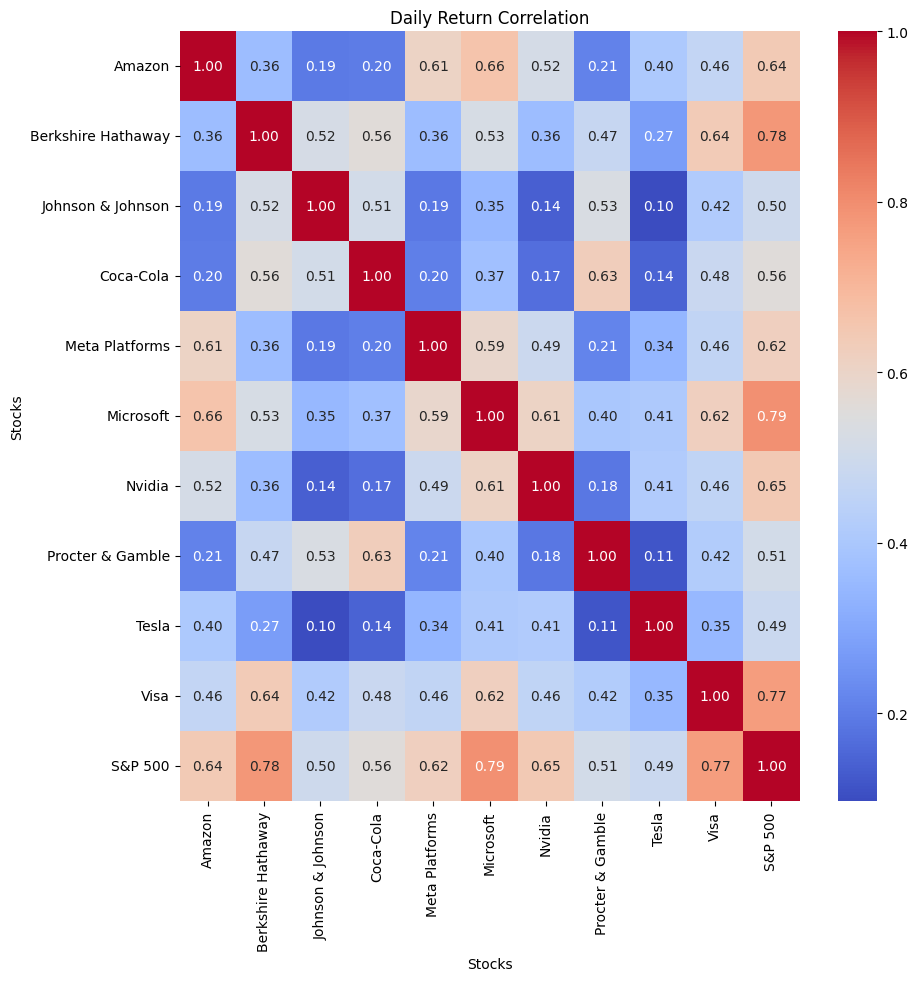

In [203]:
correlation_matrix = calculate_correlation_matrix(stocks_daily_return)
plot_correlation_heatmap(correlation_matrix)


In [204]:
# Exclude NVIDIA to better visualize the relative performance of other stocks
# Since NVIDIA's explosive growth flattens the appearance of the others

# Drop the 7th column (NVIDIA) by index — use column name for clarity
nvidia_column = normalized_close.columns[6]  # Assuming it's still in position 6
cleaned_df = normalized_close.drop(columns=[nvidia_column])

# Generate interactive Plotly chart
fig = interactive_plot(cleaned_df, 'Stock Prices Excluding NVIDIA (Normalized to 1)')


In [205]:
fig.update_layout(
    width=1000,
    height=500,
    template='plotly_dark',
    title='Normalized Stock Prices (Excluding Nvidia) vs S&P 500 (2015–2025)',
    title_font_size=22,
    title_x=0.5,  # center the title
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [206]:
# Here, Nvidia is plotted along with others, one can now see it's incredible growth

fig = interactive_plot(normalized_close, 'STOCK PRICES (NORMALIZATED i.e., Indexed to 1)')
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white') # Also changing font color to white for better visibility on a black background
)
fig.write_html('normalized_stock_prices.html')
fig.show()

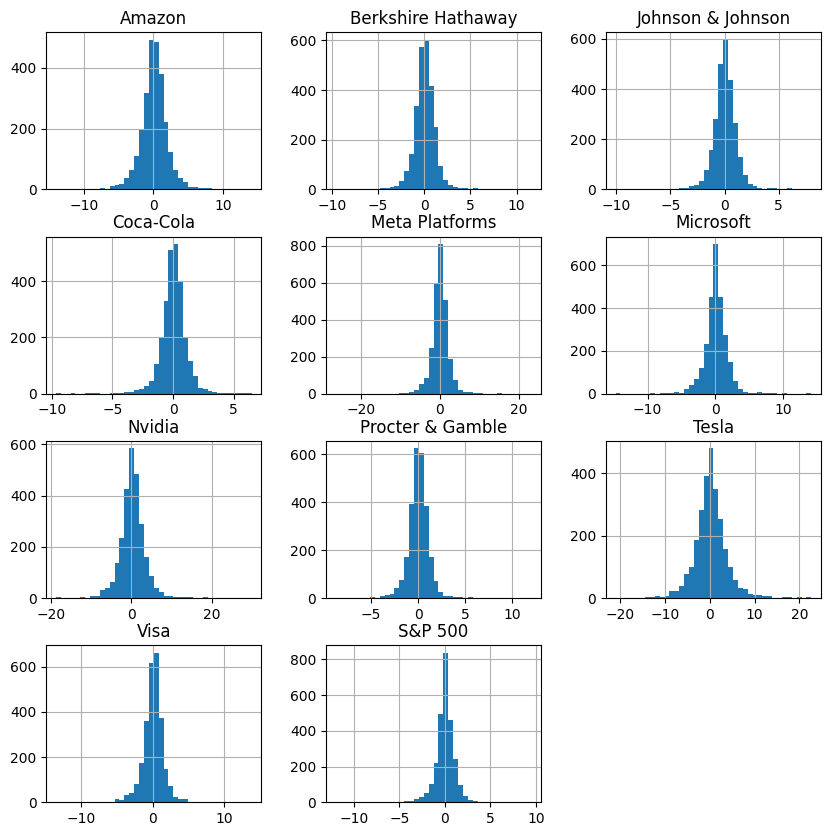

In [207]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean
# Notice how Tesla, Nvidia and Meta Platforms Standard deviation are high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

In [208]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()


data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([ 0.        , -2.05172901, -2.28333346, ...,  0.30915473,
         1.00500266,  1.40184765]),
 array([ 0.        , -1.45471489, -0.10884603, ...,  0.44344409,
         0.08449385,  0.12874966]),
 array([ 0.        , -0.69842655, -0.49137992, ..., -1.09236744,
         0.44177276,  0.40317879]),
 array([ 0.        ,  0.        ,  0.75932649, ...,  1.90558649,
        -1.04830415,  0.31496238]),
 array([ 0.        , -1.60610258, -1.34733325, ..., -0.21339859,
         0.40918382,  1.23317391]),
 array([ 0.        , -0.91957213, -1.46774487, ...,  1.20248747,
        -0.32245933,  0.00196251]),
 array([ 0.        , -1.68902576, -3.0318135 , ...,  0.95116119,
        -0.34103835, -0.59741242]),
 array([ 0.        , -0.47545116, -0.45552041, ...,  1.22942083,
         0.3474427 , -0.04513689]),
 array([ 0.        , -4.20410282,  0.56642373, ..., -0.7025864 ,
         3.2059078 , -0.35188948]),
 array([ 0.        , -2.20735983, -0.64436396, ..., -0.02572059,
        -0.21726359,  0.54

In [209]:
# Plotly's Python API contains a super powerful module known as figure factory module
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots

fig = ff.create_distplot(data, df_hist.columns)
fig.show()